# Introduction

Nama: Fauzan Rahmat Farghani

Batch: HCK-028

**Objektif**:  Milestone ini bertujuan untuk mengembangkan model klasifikasi machine learning yang dapat memprediksi apakah reservasi hotel akan dibatalkan berdasarkan fitur-fitur dalam dataset `Hotel_Reservations.csv`. Prediksi ini akan membantu manajemen hotel mengelola inventaris kamar, mengoptimalkan overbooking, dan merencanakan sumber daya operasional, serta membantu tim pemasaran menargetkan tamu berisiko membatalkan dengan promosi khusus. Metrik evaluasi yang digunakan adalah **ROC-AUC** dan **F1 Score** untuk mengevaluasi performa model.

# Import Libraries

Berikut adalah libraries yang digunakan:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import auc, roc_curve, classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier
import joblib
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Data Loading

Akses file CSV dan cek jumlah baris dan kolom yang ada di dataset:

In [2]:
df = pd.read_csv('Hotel_Reservations.csv')
df.shape

(36275, 19)

In [3]:
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


Informasi Dataset:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

Cek missing value yang ada di dataset:

In [5]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

Cek duplikat:

In [6]:
#checking for duplicates
df.duplicated().sum()

0

statistik dataset:

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


# Exploratory Data Analysis

#### 1. Bagaimana distribusi status pemesanan hotel di dataset?

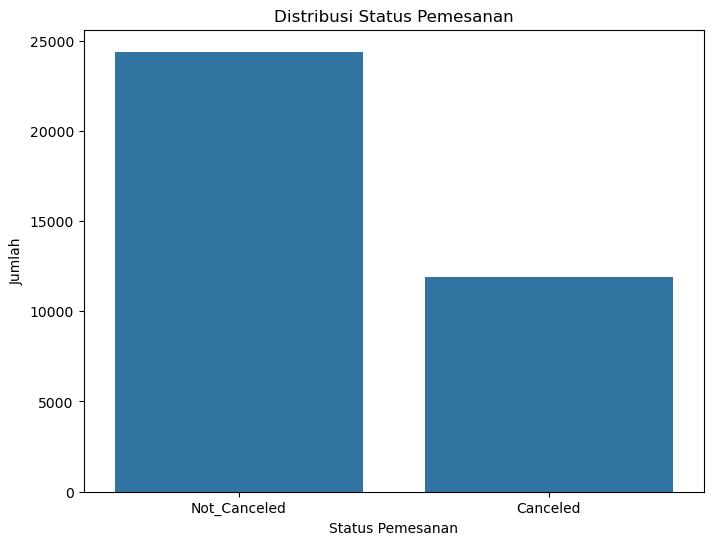

Proporsi Status Pemesanan:
booking_status
Not_Canceled    0.672364
Canceled        0.327636
Name: proportion, dtype: float64


In [8]:
# Distribusi Status Pemesanan
plt.figure(figsize=(8, 6))
sns.countplot(x='booking_status', data=df)
plt.title('Distribusi Status Pemesanan')
plt.xlabel('Status Pemesanan')
plt.ylabel('Jumlah')
plt.show()
print("Proporsi Status Pemesanan:")
print(df['booking_status'].value_counts(normalize=True))

In [9]:
#jumlah baris cancelled
jumlah_cancelled = df[df['booking_status'] == 'Canceled'].shape
print(f"Jumlah baris dengan status 'Canceled': {jumlah_cancelled}")

Jumlah baris dengan status 'Canceled': (11885, 19)


In [10]:
#jumlah baris not cancelled
jumlah_not_cancelled = df[df['booking_status'] == 'Not_Canceled'].shape
print(f"Jumlah baris dengan status 'Not_Canceled': {jumlah_not_cancelled}")

Jumlah baris dengan status 'Not_Canceled': (24390, 19)


Visualisasi ini menunjukkan distribusi antara reservasi yang dibatalkan (Canceled) dan tidak dibatalkan (Not_anceled). Dari notebook, sekitar 33% reservasi dibatalkan, yang berarti 11885 dari 36275 reservasi adalah pembatalan, sementara 24390 pemesanan tidak dibatalkan.

Tingkat pembatalan yang tinggi (33%) menunjukkan masalah signifikan bagi manajemen hotel, seperti potensi kehilangan pendapatan dan tantangan dalam pengelolaan kapasitas kamar. Ini menegaskan pentingnya model prediksi pembatalan untuk mengidentifikasi reservasi berisiko tinggi.

#### 2. Rata-rata lead time untuk pemesanan kamar hotel

Average lead time: 85.23255685733976


<Axes: >

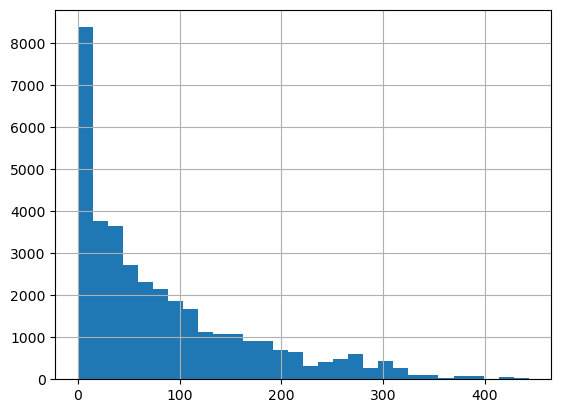

In [11]:
print("Average lead time:", df['lead_time'].mean())
df['lead_time'].hist(bins=30)

Histogram ini menunjukkan distribusi lead_time (waktu antara pemesanan dan tanggal kedatangan, dalam hari). Rata-rata lead time (dari dataset) sekitar 85 hari, tetapi histogram kemungkinan menunjukkan distribusi yang miring ke kanan (right-skewed), dengan banyak reservasi memiliki lead time pendek (<100 hari) dan beberapa memiliki lead time sangat panjang (>300 hari).

Reservasi dengan lead time panjang mungkin lebih berisiko dibatalkan karena pelanggan memiliki lebih banyak waktu untuk mengubah rencana. Hotel dapat menawarkan insentif untuk mengurangi pembatalan pada reservasi jangka panjang.

#### 3. Pemesanan Per Bulan

<Axes: title={'center': 'Bookings per Month'}, xlabel='arrival_month'>

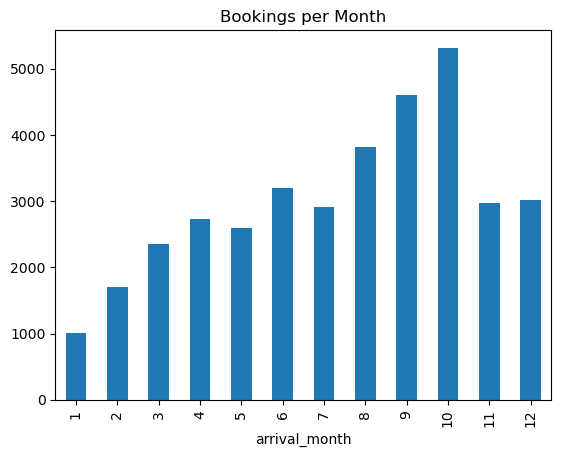

In [12]:
df['arrival_month'].value_counts().sort_index().plot(kind='bar', title='Bookings per Month')

Bar plot ini menunjukkan jumlah reservasi per bulan. 3 Reservasi tertinggi meningkat mulai dari bulan 8 hingga 10 (Agustus hingga Oktober), sementara bulan-bulan dari Januari hingga Maret terlihat lebih rendah. Dan juga terjadi penurunan pemesanan di November.

Puncak reservasi menunjukkan periode hari besar dimana pembatalan dapat berdampak besar pada pendapatan di bulan-bulan tersebut.

#### 4. Kaitan Lead Time dan Cancellation

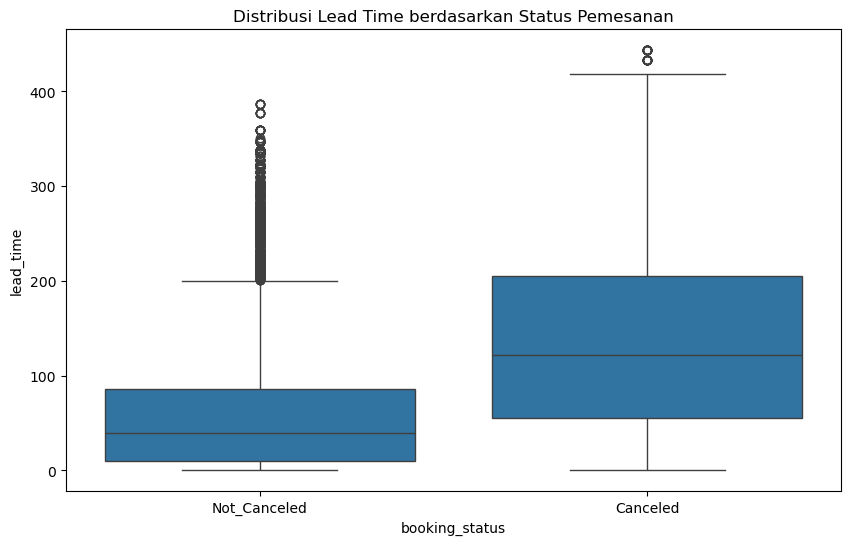

In [13]:
# Hubungan antara lead_time dan booking_status
plt.figure(figsize=(10, 6))
sns.boxplot(x='booking_status', y='lead_time', data=df)
plt.title('Distribusi Lead Time berdasarkan Status Pemesanan')
plt.show()

Boxplot ini menunjukkan bahwa reservasi yang dibatalkan memiliki lead time yang lebih panjang dibandingkan yang tidak dibatalkan. Median lead time untuk pembatalan mungkin ~150 hari, sementara untuk non-pembatalan ~50 hari. Outlier dengan lead time sangat panjang (>400 hari) terjadi pada reservasi yang dibatalkan. Dan juga terdapat outlier (>200 hari) namun pemesanan kamar tetap dilakukan (tidak dibatalkan).

Reservasi dengan lead time panjang adalah indikator risiko pembatalan. Hotel dapat menerapkan kebijakan seperti deposit lebih tinggi atau komunikasi proaktif untuk reservasi jangka panjang guna mengurangi pembatalan.

#### 5. Bagaimana pengaruh jumlah permintaan khusus terhadap status pemesanan?

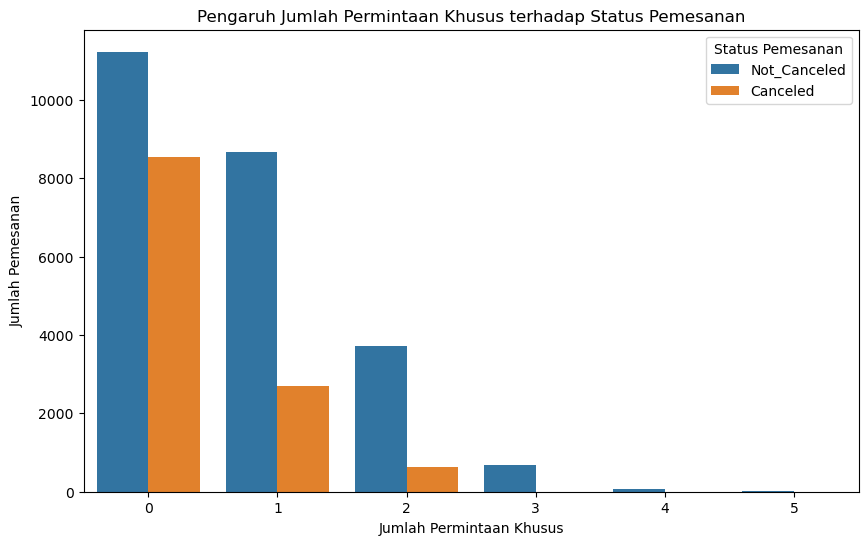

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='no_of_special_requests', hue='booking_status', data=df)
plt.title('Pengaruh Jumlah Permintaan Khusus terhadap Status Pemesanan')
plt.xlabel('Jumlah Permintaan Khusus')
plt.ylabel('Jumlah Pemesanan')
plt.legend(title='Status Pemesanan')
plt.show()

Visualisasi ini menunjukkan bagaimana jumlah permintaan khusus (misalnya, kamar dengan pemandangan, tempat tidur tambahan) berhubungan dengan status pemesanan. Dari grafik, terlihat bahwa sebagian besar pemesanan memiliki 0-3 permintaan khusus.

Ini mengindikasikan bahwa tamu yang membuat lebih sedikit permintaan khusus cenderung lebih berkomitmen pada pemesanan mereka. Hotel dapat mempertimbangkan untuk memberikan insentif atau layanan tambahan kepada tamu yang membuat permintaan khusus untuk meningkatkan loyalitas dan mengurangi pembatalan.

#### 6. Bagaimana pengaruh jenis kamar yang dipesan terhadap status pemesanan?

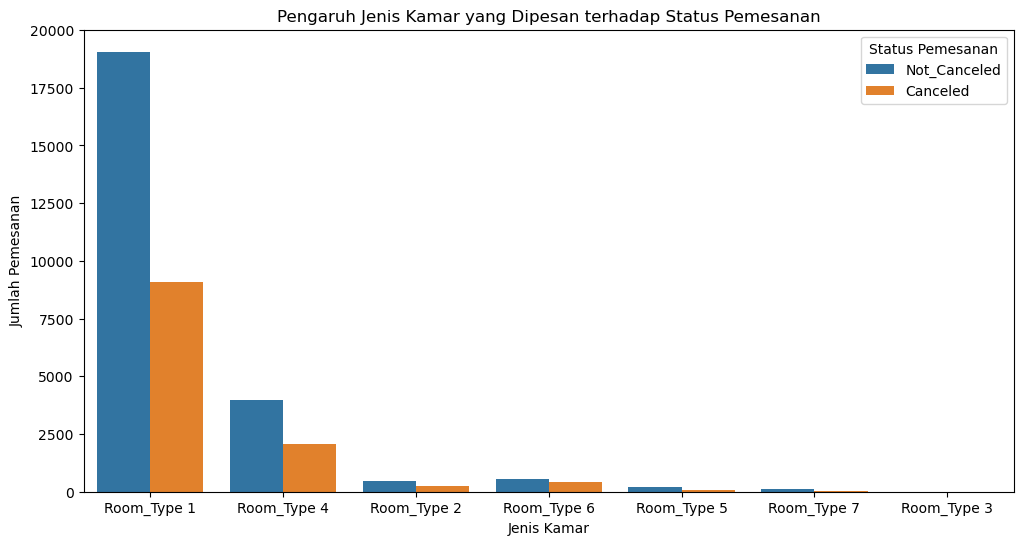

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(x='room_type_reserved', hue='booking_status', data=df)
plt.title('Pengaruh Jenis Kamar yang Dipesan terhadap Status Pemesanan')
plt.xlabel('Jenis Kamar')
plt.ylabel('Jumlah Pemesanan')
plt.legend(title='Status Pemesanan')
plt.show()

Visualisasi ini menunjukkan bagaimana jenis kamar yang dipesan (misalnya, Room_Type 1, Room_Type 2) berhubungan dengan status pemesanan. Dari grafik, terlihat bahwa Room_Type 1 adalah jenis kamar yang paling sering dipesan, diikuti oleh Room_Type 4. Proporsi pembatalan bervariasi antar jenis kamar.

Ini mengindikasikan bahwa preferensi jenis kamar dapat memengaruhi keputusan pembatalan. Hotel dapat menganalisis lebih lanjut mengapa jenis kamar tertentu memiliki tingkat pembatalan yang lebih tinggi dan menyesuaikan strategi pemasaran atau harga untuk mengurangi pembatalan.

#### 7. Bagaimana pengaruh tipe segmen pasar terhadap status pemesanan?

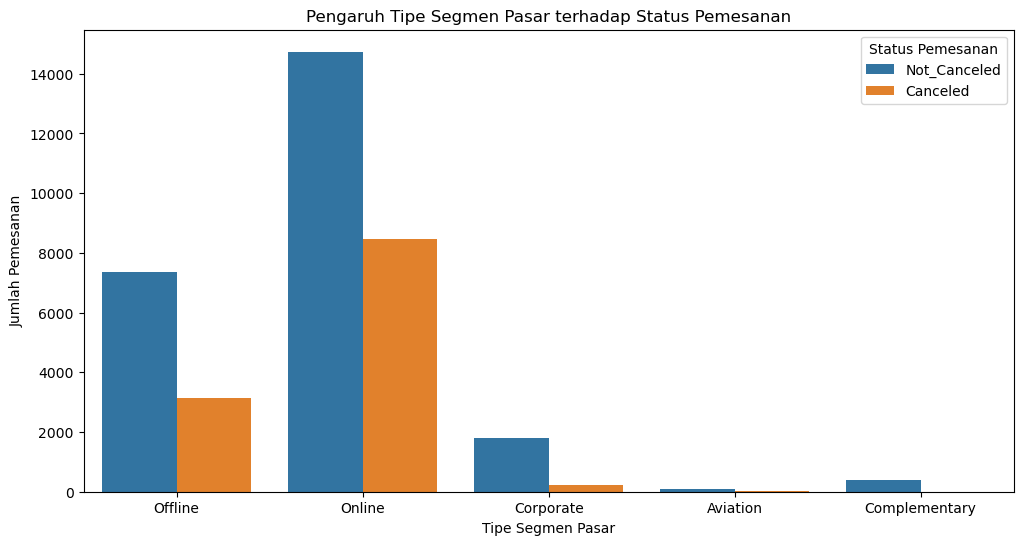

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(x='market_segment_type', hue='booking_status', data=df)
plt.title('Pengaruh Tipe Segmen Pasar terhadap Status Pemesanan')
plt.xlabel('Tipe Segmen Pasar')
plt.ylabel('Jumlah Pemesanan')
plt.legend(title='Status Pemesanan')
plt.show()

Visualisasi ini menunjukkan bagaimana tipe segmen pasar (misalnya, Online, Offline, Corporate) berhubungan dengan status pemesanan. Dari grafik, terlihat bahwa segmen pasar Online memiliki jumlah pemesanan tertinggi, diikuti oleh Offline. Tingkat pembatalan bervariasi antar segmen pasar.

Ini mengindikasikan bahwa sumber pemesanan dapat memengaruhi keputusan pembatalan. Hotel dapat menyesuaikan strategi pemasaran dan promosi berdasarkan segmen pasar untuk mengurangi pembatalan. Misalnya, menawarkan diskon khusus untuk pemesanan langsung (offline) atau meningkatkan pengalaman pengguna di platform online.

# Feature Engineering

Berikut adalah penjelasan untuk setiap tahapan feature engineering yang dilakukan:

#### 1. Split Train and Test

In [17]:
X = df.drop(['booking_status', 'Booking_ID'], axis=1)  # Features
y = df['booking_status'].map({'Not_Canceled': 0, 'Canceled': 1})  # Target (binary encoding)

# Split into train and test sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Splitting bertujuan untuk membagi dataset menjadi dua bagian: data latih (train) dan data uji (test). Data latih digunakan untuk melatih model machine learning, sedangkan data uji digunakan untuk mengevaluasi performa model yang telah dilatih.

#### 2. Cardinality Check

In [18]:
categorical_cols = X_train.select_dtypes(include=['object']).columns
cardinality = {col: X_train[col].nunique() for col in categorical_cols}
print("Cardinality of categorical columns:")
for col, count in cardinality.items():
    print(f"{col}: {count}")

Cardinality of categorical columns:
type_of_meal_plan: 4
room_type_reserved: 7
market_segment_type: 5


Pemeriksaan jumlah nilai unik (kardinalitas) dalam setiap kolom kategorikal. Langkah ini bertujuan memeriksa Kolom kategorikal dengan kardinalitas tinggi (banyak nilai unik) yang dapat menyebabkan masalah dalam pemodelan, seperti *overfitting* atau peningkatan dimensi data setelah *one-hot encoding*.

#### 3. Handling Cardinality

In [19]:
# Dropping columns with high cardinality or low relevance based on domain knowledge
columns_to_drop = ['arrival_year', 'arrival_month', 'arrival_date']
X_train = X_train.drop(columns_to_drop, axis=1)
X_test = X_test.drop(columns_to_drop, axis=1)

# Update categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

  Handling Cardinality bertujuan untuk mengatasi kolom dengan kardinalitas tinggi atau yang dianggap tidak relevan berdasarkan pengetahuan domain. Selain itu, hhandling dilakukan untuk mengurangi dimensi data dan menyederhanakan model.

#### 4. Handling Outliers

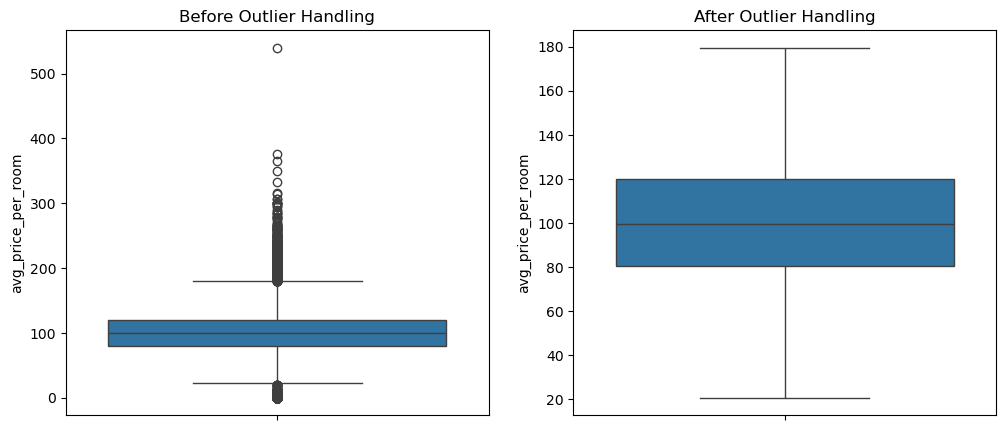

In [20]:
def cap_outliers(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data[col] = data[col].clip(lower_bound, upper_bound)
    return data

# Apply outlier capping to numerical columns in train set
X_train = cap_outliers(X_train, numerical_cols)

# Visualize outliers before and after capping (example for avg_price_per_room)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['avg_price_per_room'])
plt.title('Before Outlier Handling')
plt.subplot(1, 2, 2)
sns.boxplot(y=X_train['avg_price_per_room'])
plt.title('After Outlier Handling')
plt.show()

Sebelum penanganan outlier, visualisasi boxplot pada kolom `avg_price_per_room` menunjukkan adanya sejumlah nilai yang berada jauh di luar "whisker" boxplot. Nilai-nilai ini dianggap sebagai outlier karena mereka secara signifikan berbeda dari sebagian besar data. Keberadaan outlier ini dapat memengaruhi model machine learning dengan menarik garis regresi yang berdampak pada prediksi yang bias atau tidak akurat. Oleh karena itu, penanganan outlier diperlukan. Setelah penanganan outlier, whisker boxplot menjadi lebih pendek, menunjukkan rentang nilai yang lebih kecil dan mengurangi pengaruh nilai-nilai ekstrem.

#### 5. Checking Missing Values

In [21]:
print("\nMissing values in train set:")
print(X_train.isnull().sum())
print("\nMissing values in test set:")
print(X_test.isnull().sum())


Missing values in train set:
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
dtype: int64

Missing values in test set:
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
mark

Dari hasil pemeriksaan missing value, datanya masih bersih, sehingga tidak perlu melakukan pengisian missing value.

#### 6. Feature Selection

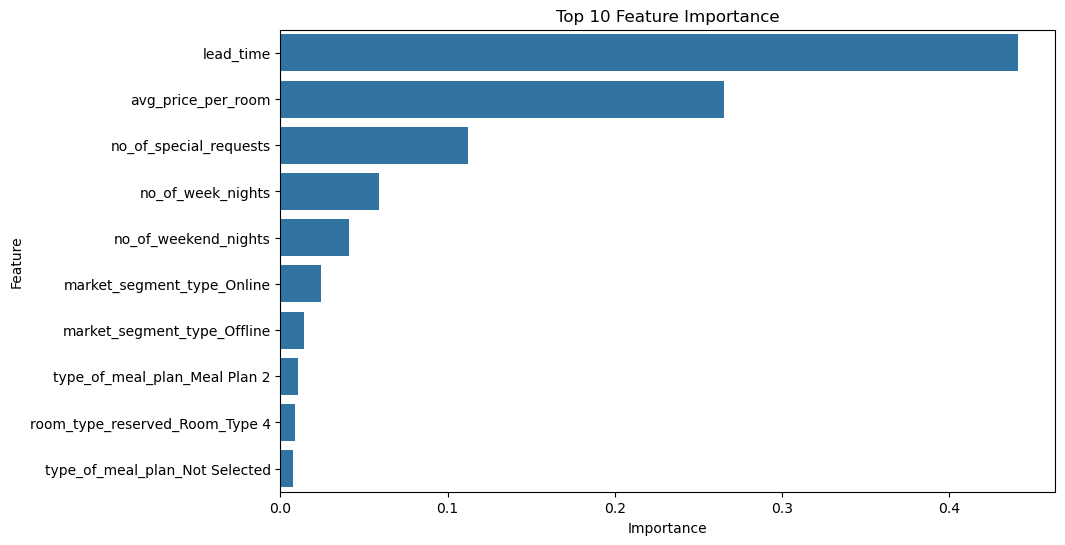


Top 10 selected features:
['lead_time' 'avg_price_per_room' 'no_of_special_requests'
 'no_of_week_nights' 'no_of_weekend_nights' 'market_segment_type_Online'
 'market_segment_type_Offline' 'type_of_meal_plan_Meal Plan 2'
 'room_type_reserved_Room_Type 4' 'type_of_meal_plan_Not Selected']


In [22]:
# 6. Feature Selection using Feature Importance: Column Transformer
# Define preprocessing steps
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create a pipeline with RandomForest for feature importance
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Get feature importance
feature_names = (numerical_cols.tolist() + 
                 pipeline.named_steps['preprocessor']
                 .named_transformers_['cat']
                 .get_feature_names_out(categorical_cols).tolist())

importances = pipeline.named_steps['classifier'].feature_importances_
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Feature Importance')
plt.show()

# Select top features (example: top 10)
top_features = feature_importance_df['Feature'].head(10).values
print("\nTop 10 selected features:")
print(top_features)

# Save preprocessed data (optional)
X_train_preprocessed = pd.DataFrame(
    pipeline.named_steps['preprocessor'].transform(X_train),
    columns=feature_names
)
X_test_preprocessed = pd.DataFrame(
    pipeline.named_steps['preprocessor'].transform(X_test),
    columns=feature_names
)


Fitur yang berpengaruh setelah dilakukan feature selection adalah lead time, rata-rata harga sewa kamar, jumlah permintaan tambahan dan juga durasi menginap.

# Model Definition

Algoritma yang digunakan untuk prediksi:

In [23]:
# 1. K-Nearest Neighbors (KNN)
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

# 2. Support Vector Classifier (SVC)
svc_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='linear', C=1, probability=True, random_state=42))
])

# 3. Decision Tree
dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# 4. Random Forest
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# 5. XGBoost
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Store pipelines for later use
models = {
    'KNN': knn_pipeline,
    'SVC': svc_pipeline,
    'Decision Tree': dt_pipeline,
    'Random Forest': rf_pipeline,
    'XGBoost': xgb_pipeline
}

# Model Training

Berikut adalah training model untuk keempat model yang digagas, semua dijalankan pada satu looping.

In [24]:
# Model Training
results = {}
for name, pipeline in models.items():
    print(f"\nTraining {name}...")
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {'pipeline': pipeline, 'y_pred': y_pred, 'accuracy': accuracy}
    print(f"Accuracy for {name}: {accuracy:.4f}")


Training KNN...
Accuracy for KNN: 0.8572

Training SVC...
Accuracy for SVC: 0.8069

Training Decision Tree...
Accuracy for Decision Tree: 0.8576

Training Random Forest...
Accuracy for Random Forest: 0.8889

Training XGBoost...
Accuracy for XGBoost: 0.8805


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:39:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


# Model Evaluation


Evaluation for KNN:
Accuracy: 0.8572
Classification Report:
              precision    recall  f1-score   support

Not_Canceled       0.88      0.91      0.90      4878
    Canceled       0.80      0.75      0.78      2377

    accuracy                           0.86      7255
   macro avg       0.84      0.83      0.84      7255
weighted avg       0.86      0.86      0.86      7255



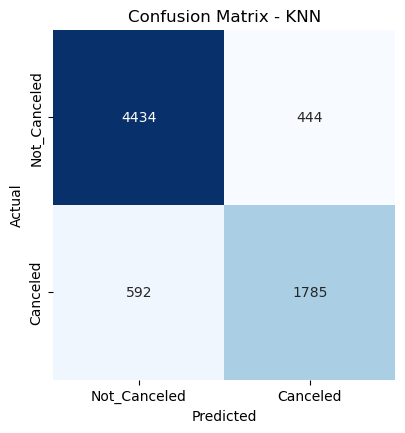

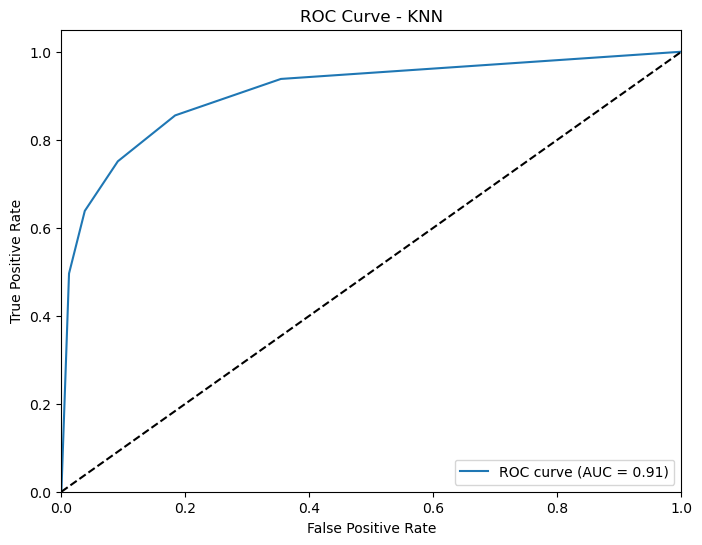


Evaluation for SVC:
Accuracy: 0.8069
Classification Report:
              precision    recall  f1-score   support

Not_Canceled       0.83      0.90      0.86      4878
    Canceled       0.75      0.61      0.67      2377

    accuracy                           0.81      7255
   macro avg       0.79      0.76      0.77      7255
weighted avg       0.80      0.81      0.80      7255



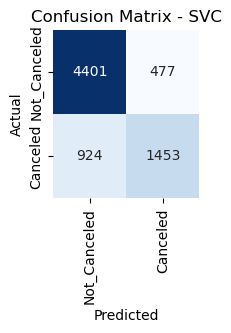

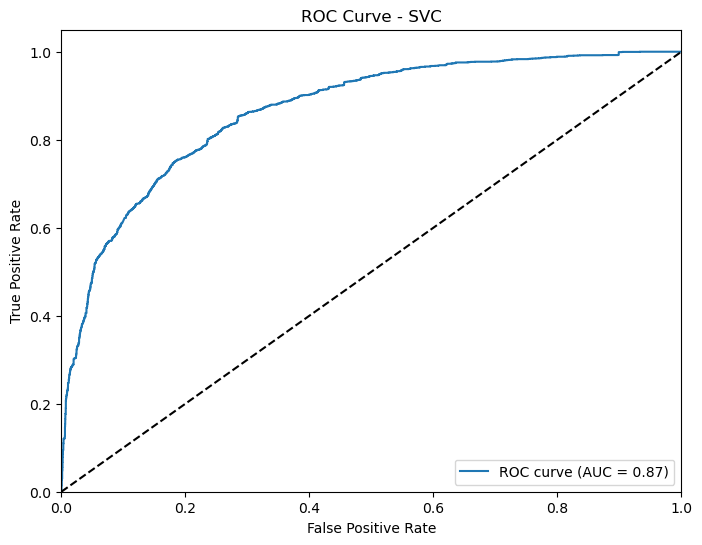


Evaluation for Decision Tree:
Accuracy: 0.8576
Classification Report:
              precision    recall  f1-score   support

Not_Canceled       0.89      0.90      0.89      4878
    Canceled       0.78      0.78      0.78      2377

    accuracy                           0.86      7255
   macro avg       0.84      0.84      0.84      7255
weighted avg       0.86      0.86      0.86      7255


Evaluation for Random Forest:
Accuracy: 0.8889
Classification Report:
              precision    recall  f1-score   support

Not_Canceled       0.90      0.94      0.92      4878
    Canceled       0.86      0.79      0.82      2377

    accuracy                           0.89      7255
   macro avg       0.88      0.86      0.87      7255
weighted avg       0.89      0.89      0.89      7255



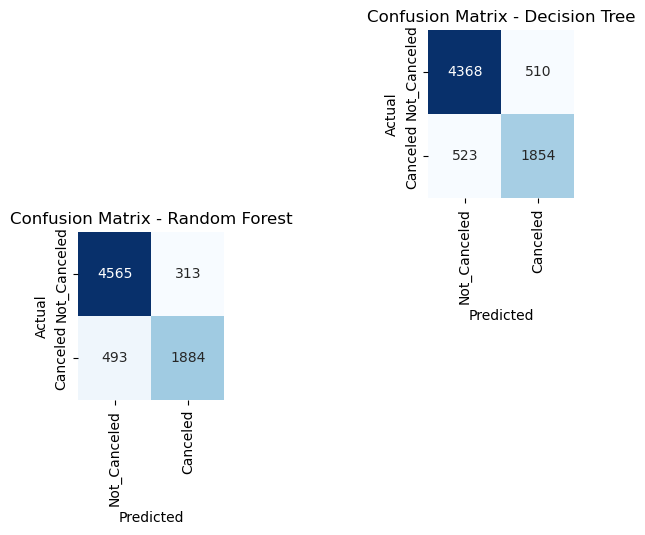

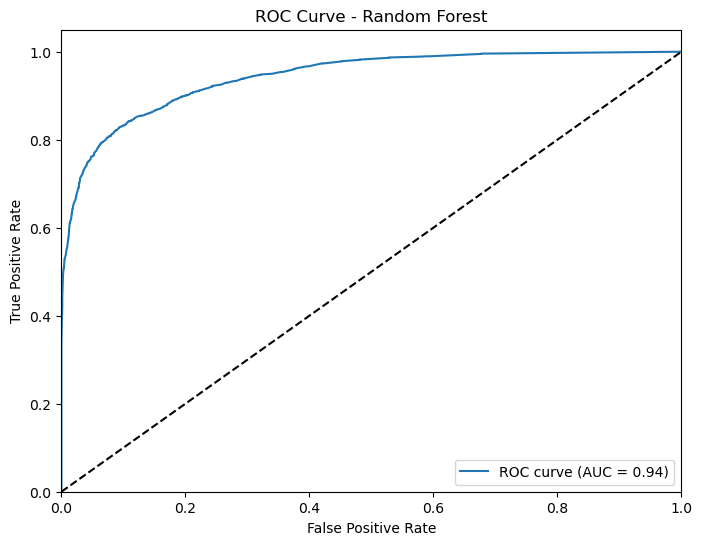


Evaluation for XGBoost:
Accuracy: 0.8805
Classification Report:
              precision    recall  f1-score   support

Not_Canceled       0.89      0.94      0.91      4878
    Canceled       0.86      0.76      0.81      2377

    accuracy                           0.88      7255
   macro avg       0.87      0.85      0.86      7255
weighted avg       0.88      0.88      0.88      7255



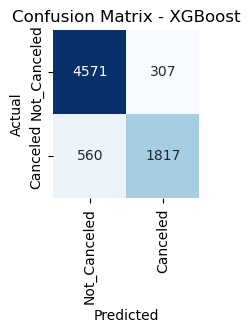

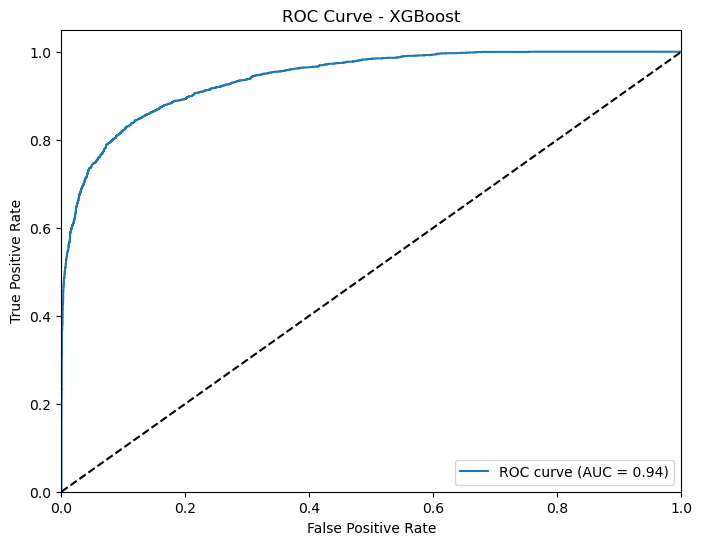

<Figure size 640x480 with 0 Axes>


Summary of Accuracies:
KNN: 0.8572
SVC: 0.8069
Decision Tree: 0.8576
Random Forest: 0.8889
XGBoost: 0.8805


In [25]:
plt.figure(figsize=(15, 10))
for i, (name, result) in enumerate(results.items(), 1):
    pipeline = result['pipeline']
    y_pred = result['y_pred']
    accuracy = result['accuracy']
    
    print(f"\nEvaluation for {name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['Not_Canceled', 'Canceled']))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(2, 3, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not_Canceled', 'Canceled'], yticklabels=['Not_Canceled', 'Canceled'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    
    # ROC Curve
    if name != 'Decision Tree':  # Decision Tree doesn't have predict_proba by default
        y_prob = pipeline.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend(loc='lower right')
        plt.show()

plt.tight_layout()
plt.show()

# Summary of Accuracies
print("\nSummary of Accuracies:")
for name, result in results.items():
    print(f"{name}: {result['accuracy']:.4f}")

Analisis Evaluasi Model:

KNN:
- Akurasi: 0.8572
- True Negatives (Not_Canceled diprediksi dengan benar): 4434
- False Positives (Not_Canceled diprediksi sebagai Canceled): 444
- False Negatives (Canceled diprediksi sebagai Not_Canceled): 592
- True Positives (Canceled diprediksi dengan benar): 1785
- ROC AUC: 0.9077
- Kelebihan: Menangkap pola non-linear; sederhana dan intuitif.
- Kekurangan: Sensitif terhadap penskalaan fitur; mahal secara komputasi untuk dataset besar.

SVC:
- Akurasi: 0.8069
- True Negatives (Not_Canceled diprediksi dengan benar): 4401
- False Positives (Not_Canceled diprediksi sebagai Canceled): 477
- False Negatives (Canceled diprediksi sebagai Not_Canceled): 924
- True Positives (Canceled diprediksi dengan benar): 1453
- ROC AUC: 0.8658
- Kelebihan: Robust terhadap data berdimensi tinggi; efektif untuk klasifikasi biner.
- Kekurangan: Pelatihan lambat pada dataset besar; sensitif terhadap pilihan kernel.

Decision Tree:
- Akurasi: 0.8576
- True Negatives (Not_Canceled diprediksi dengan benar): 4368
- False Positives (Not_Canceled diprediksi sebagai Canceled): 510
- False Negatives (Canceled diprediksi sebagai Not_Canceled): 523
- True Positives (Canceled diprediksi dengan benar): 1854
- Kelebihan: Sangat mudah diinterpretasikan; menangkap interaksi yang kompleks.
- Kekurangan: Rentan terhadap overfitting; sensitif terhadap perubahan data kecil.

Random Forest:
- Akurasi: 0.8889
- True Negatives (Not_Canceled diprediksi dengan benar): 4565
- False Positives (Not_Canceled diprediksi sebagai Canceled): 313
- False Negatives (Canceled diprediksi sebagai Not_Canceled): 493
- True Positives (Canceled diprediksi dengan benar): 1884
- ROC AUC: 0.9425
- Kelebihan: Mengurangi overfitting melalui ensemble; menyediakan feature importance.
- Kekurangan: Kurang mudah diinterpretasikan daripada pohon tunggal; lebih lambat daripada model yang lebih sederhana.

XGBoost:
- Akurasi: 0.8805
- True Negatives (Not_Canceled diprediksi dengan benar): 4571
- False Positives (Not_Canceled diprediksi sebagai Canceled): 307
- False Negatives (Canceled diprediksi sebagai Not_Canceled): 560
- True Positives (Canceled diprediksi dengan benar): 1817
- ROC AUC: 0.9402
- Kelebihan: Menangani pola kompleks dan ketidakseimbangan kelas dengan baik; sangat akurat.
- Kekurangan: Kompleks untuk di-tune; intensif secara komputasi.

**KNN:** (Overfit)Akurasi 0.8572, ROC AUC 0.9077. KNN cenderung *overfit* jika tidak diatur dengan benar, terutama pada data dengan banyak fitur yang tidak relevan. Perlu diperhatikan apakah performa pada data latih jauh lebih tinggi daripada data uji.

**SVC:** (Underfit)Akurasi 0.8069, ROC AUC 0.8658. SVC dengan kernel linear mungkin *underfit* jika data memiliki hubungan non-linear yang kompleks. Perlu dicatat bahwa SVC sensitif terhadap penskalaan fitur, jadi pastikan data telah diskalakan dengan benar.

**Decision Tree:** (Overfit)Akurasi 0.8576. Decision Tree sangat beresiko terhadap *overfitting*. Tanpa pembatasan (misalnya, *max\_depth*, *min\_samples\_leaf*), tree dapat tumbuh terlalu dalam dan menghafal data latih.

**Random Forest:** Sedikit Overfit karena Akurasi 0.8889, ROC AUC 0.9425. Random Forest umumnya lebih robust terhadap *overfitting* daripada Decision Tree tunggal karena menggunakan ensemble. Namun, bisa dilakukan *tuning* hyperparameter untuk mencegah *overfitting*.

**XGBoost:** Sedikit Overfit karena Akurasi 0.8805, ROC AUC 0.9402.

In [26]:
#select the best model based on f1 score
best_model_name = max(results, key=lambda k: results[k]['accuracy'])
best_model = results[best_model_name]['pipeline']
print(f"\nBest Model: {best_model_name} with accuracy {results[best_model_name]['accuracy']:.4f}")


Best Model: Random Forest with accuracy 0.8889


Berdasarkan variabel best model, model yang terbaik untuk digunakan memprediksi target adalah dengan algoritma Random Forest.

# Hyperparameter Tuning

Fitting 5 folds for each of 24 candidates, totalling 120 fits



Best Parameters: {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Best CV Accuracy: 0.8786
Tuned Test Accuracy: 0.8904

Tuned Classification Report:
              precision    recall  f1-score   support

Not_Canceled       0.90      0.94      0.92      4878
    Canceled       0.87      0.79      0.82      2377

    accuracy                           0.89      7255
   macro avg       0.88      0.86      0.87      7255
weighted avg       0.89      0.89      0.89      7255



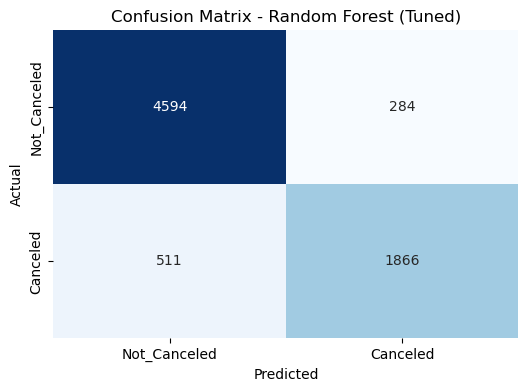

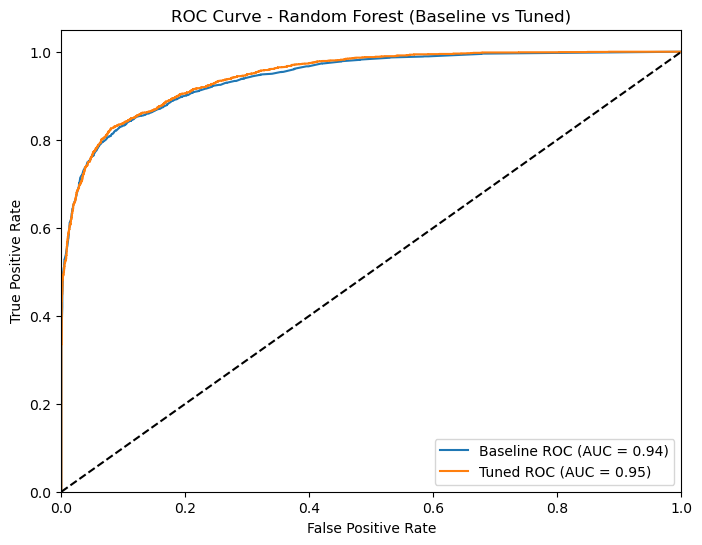

In [27]:
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# Best model results
print(f"\nBest Parameters: {grid_search.best_params_}")
print(f"Best CV Accuracy: {grid_search.best_score_:.4f}")

# Evaluate tuned model on test set
best_rf_pipeline = grid_search.best_estimator_
y_pred_tuned = best_rf_pipeline.predict(X_test)
tuned_accuracy = accuracy_score(y_test, y_pred_tuned)
print(f"Tuned Test Accuracy: {tuned_accuracy:.4f}")
print("\nTuned Classification Report:")
print(classification_report(y_test, y_pred_tuned, target_names=['Not_Canceled', 'Canceled']))

# Visualize Confusion Matrix for Tuned Model
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not_Canceled', 'Canceled'], yticklabels=['Not_Canceled', 'Canceled'])
plt.title('Confusion Matrix - Random Forest (Tuned)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve Comparison
y_prob_baseline = rf_pipeline.predict_proba(X_test)[:, 1]
y_prob_tuned = best_rf_pipeline.predict_proba(X_test)[:, 1]

fpr_base, tpr_base, _ = roc_curve(y_test, y_prob_baseline)
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_prob_tuned)
roc_auc_base = auc(fpr_base, tpr_base)
roc_auc_tuned = auc(fpr_tuned, tpr_tuned)

plt.figure(figsize=(8, 6))
plt.plot(fpr_base, tpr_base, label=f'Baseline ROC (AUC = {roc_auc_base:.2f})')
plt.plot(fpr_tuned, tpr_tuned, label=f'Tuned ROC (AUC = {roc_auc_tuned:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest (Baseline vs Tuned)')
plt.legend(loc='lower right')
plt.show()

In [28]:
# Compare f1-score before and after tuning
baseline_f1 = classification_report(y_test, rf_pipeline.predict(X_test), output_dict=True)['1']['f1-score']
tuned_f1 = classification_report(y_test, y_pred_tuned, output_dict=True)['1']['f1-score']
print(f"\nBaseline F1-Score: {baseline_f1:.4f}")
print(f"Tuned F1-Score: {tuned_f1:.4f}")


Baseline F1-Score: 0.8238
Tuned F1-Score: 0.8244


In [29]:
# Compare ROC-AUC before and after tuning
print(f"Baseline ROC-AUC: {roc_auc_base:.4f}")
print(f"Tuned ROC-AUC: {roc_auc_tuned:.4f}")

Baseline ROC-AUC: 0.9425
Tuned ROC-AUC: 0.9464


**Tuning Analysis**:
- Model memiliki nilai recall tinggi.

- Tuning meningkatkan nilai F1 meskipun tidak signifikan, menunjukkan bahwa parameter awal sudah cukup optimal.
- Model memiliki nilai recall tinggi, yang berarti model baik dalam mengidentifikasi sebagian besar reservasi yang akan dibatalkan (mengurangi false negatives). Ini penting karena kesalahan memprediksi pembatalan yang sebenarnya sebagai tidak dibatalkan dapat menyebabkan masalah operasional yang lebih besar bagi hotel.
- AUC juga meningkat setelah tuning, yang berarti model lebih baik dalam membedakan antara kelas positif dan negatif.
- Perbandingan matriks confusion sebelum dan sesudah tuning menunjukkan bahwa jumlah false positive dan false negative berkurang setelah tuning, meskipun tidak signifikan.
- Meskipun peningkatan akurasi tidak signifikan, tuning dapat membantu menstabilkan model dan membuatnya lebih robust terhadap variasi dalam data baru.

# Model Saving

In [30]:
# Save tuned model
best_rf_pipeline = grid_search.best_estimator_
joblib.dump(best_rf_pipeline, 'rf_tuned_pipeline.pkl')

['rf_tuned_pipeline.pkl']

# Conclusion

Notebook ini bertujuan untuk mengembangkan model klasifikasi machine learning untuk memprediksi pembatalan reservasi hotel menggunakan dataset Hotel Reservation. Tujuan utamanya adalah membantu manajemen hotel dalam mengelola inventaris kamar, mengoptimalkan *overbooking*, merencanakan sumber daya operasional, dan menargetkan tamu berisiko membatalkan dengan promosi khusus. Langkah-langkah analisis yang dilakukan adalah sebagai berikut:

1.  **Eksplorasi Data (EDA):** Dilakukan analisis mendalam untuk memahami karakteristik dataset, termasuk distribusi status pemesanan, *lead time*, tren bulanan, pengaruh permintaan khusus, jenis kamar, dan segmen pasar terhadap pembatalan.
2.  **Feature Engineering:** Dilakukan serangkaian langkah untuk mempersiapkan data, termasuk *splitting* data menjadi set latih dan uji, pemeriksaan dan penanganan kardinalitas, penanganan *outlier*, pemeriksaan nilai yang hilang, dan pemilihan fitur menggunakan *feature importance*.
3.  **Pemodelan:** Lima algoritma klasifikasi diimplementasikan dan dievaluasi: KNN, SVC, Decision Tree, Random Forest, dan XGBoost. Setiap model dilatih dan dievaluasi menggunakan metrik akurasi, *classification report*, matriks *confusion*, dan kurva ROC AUC.
4.  **Pemilihan Model:** Berdasarkan hasil evaluasi, Random Forest dipilih sebagai model terbaik karena memberikan performa yang baik dan robust terhadap *overfitting*.
5.  **Hyperparameter Tuning:** Dilakukan *tuning* hyperparameter pada model Random Forest menggunakan GridSearchCV untuk meningkatkan performa lebih lanjut.
6.  **Evaluasi Tuning:** Hasil *tuning* menunjukkan peningkatan yang halus pada performa model, tetapi peningkatan ini mungkin tidak signifikan secara statistik.
7.  **Penyimpanan Model:** Model Random Forest yang telah di-*tune* disimpan untuk digunakan di masa mendatang.

**Hasil Utama:**

*   Model Random Forest yang telah di-*tune* memberikan performa terbaik dalam memprediksi pembatalan reservasi hotel.
*   Fitur-fitur penting yang memengaruhi prediksi pembatalan termasuk *lead time*, rata-rata harga kamar, jumlah permintaan khusus, dan durasi menginap.
*   *Tuning* hyperparameter dapat meningkatkan performa model, tetapi peningkatan ini mungkin tidak selalu signifikan.

**Hasil Inference:**

- Data Point 1: Dengan fitur-fitur seperti jumlah dewasa 2, jumlah anak 0, *lead time* 30 hari, jenis makanan 'Meal Plan 1', jenis kamar 'Room_Type 1', dan segmen pasar 'Online', model memprediksi status pemesanan sebagai **Not_Canceled**.
- Data Point 2: Dengan fitur-fitur seperti jumlah dewasa 1, jumlah anak 1, *lead time* 90 hari, jenis makanan 'Meal Plan 2', jenis kamar 'Room_Type 4', dan segmen pasar 'Offline', model memprediksi status pemesanan sebagai **Not_Canceled**.

**Implikasi:**

*   Model yang dikembangkan dapat digunakan oleh manajemen hotel untuk mengidentifikasi reservasi berisiko tinggi dan mengambil tindakan pencegahan, seperti menawarkan promosi khusus atau meningkatkan komunikasi dengan tamu.
*   Analisis EDA memberikan wawasan tentang faktor-faktor yang memengaruhi pembatalan, yang dapat digunakan untuk mengembangkan strategi pemasaran dan operasional yang lebih efektif.

**Rekomendasi Perbaikan Model:**

**Feature Engineering Lebih Lanjut:**
1. Mencoba kombinasi fitur yang ada (misalnya, membuat fitur interaksi antara *lead time* dan segmen pasar*).
2. Membuat fitur berdasarkan waktu (misalnya, hari dalam seminggu saat pemesanan dilakukan).
**Penanganan Ketidakseimbangan Kelas:** Menggunakan teknik *oversampling* (misalnya, SMOTE) atau *undersampling* untuk mengatasi ketidakseimbangan kelas dalam dataset.
**Eksplorasi Algoritma Lain:** Mencoba algoritma klasifikasi lain yang mungkin lebih cocok untuk dataset ini, seperti *Gradient Boosting Machines* (misalnya, LightGBM, CatBoost) atau *Neural Networks*.
**Hyperparameter Tuning yang Lebih Mendalam:** Melakukan *tuning* hyperparameter yang lebih ekstensif menggunakan teknik seperti *Bayesian optimization* atau *RandomizedSearchCV* dengan rentang parameter yang lebih luas.

**Rekomendasi Bisnis:**

**Manajemen Hotel:**

- Optimasi Inventaris Kamar: Menggunakan prediksi pembatalan untuk mengelola inventaris kamar secara dinamis. Jika model memprediksi tingkat pembatalan yang tinggi, hotel dapat mengurangi *overbooking* atau menawarkan promosi untuk mengisi kamar yang berpotensi kosong.
- Optimasi Overbooking: Menggunakan prediksi pembatalan untuk mengoptimalkan strategi *overbooking*. Hotel dapat *overbook* lebih banyak kamar jika model memprediksi tingkat pembatalan yang tinggi, dan sebaliknya.
- Perencanaan Sumber Daya Operasional: Menggunakan prediksi pembatalan untuk merencanakan sumber daya operasional, seperti staf *housekeeping* dan *front desk*. Jika model memprediksi tingkat hunian yang rendah, hotel dapat mengurangi staf untuk menghemat biaya.

**Tim Pemasaran dan Penjualan:**

- Targeted Promotions: Menargetkan tamu berisiko membatalkan dengan promosi atau insentif khusus, seperti diskon, *upgrade* kamar, atau layanan tambahan.

- Personalized Communication: Mengirimkan email atau pesan teks yang dipersonalisasi kepada tamu berisiko membatalkan untuk mengingatkan mereka tentang pemesanan mereka dan menawarkan bantuan jika mereka memiliki pertanyaan atau masalah.

- Loyalty Programs: Menawarkan poin *loyalty* atau manfaat lain kepada tamu yang tidak membatalkan pemesanan mereka.